<a href="https://colab.research.google.com/github/Neermita18/NSCLC_gene_mutation_cse_intern/blob/main/Tumor_segmentations_from_XML_AIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Checking how to extract coordinates from AIM XML files

In [11]:
import xml.etree.ElementTree as ET


xml_file = 'AMC-003.xml'

try:

    tree = ET.parse(xml_file)
    root = tree.getroot()


    ns = {
        'aim': 'gme://caCORE.caCORE/4.4/edu.northwestern.radiology.AIM',
        'xsi': 'http://www.w3.org/2001/XMLSchema-instance',
    }


    markup_entities = root.findall('.//aim:MarkupEntity[@xsi:type="TwoDimensionCircle"]', ns)


    for markup_entity in markup_entities:

        unique_identifier = markup_entity.find('aim:uniqueIdentifier', ns).attrib.get('root')

        coordinates = []
        coordinate_elements = markup_entity.findall('aim:twoDimensionSpatialCoordinateCollection/aim:TwoDimensionSpatialCoordinate', ns)
        for coord_elem in coordinate_elements:
            x = float(coord_elem.find('aim:x', ns).attrib.get('value'))
            y = float(coord_elem.find('aim:y', ns).attrib.get('value'))
            coordinates.append((x, y))

        print(f"Unique Identifier: {unique_identifier}")
        print("Coordinates:")
        for idx, (x, y) in enumerate(coordinates):
            print(f"  Coordinate {idx + 1}: ({x}, {y})")
        print()

except FileNotFoundError:
    print(f"File '{xml_file}' not found.")
except ET.ParseError as e:
    print(f"Error parsing XML: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Unique Identifier: z2wxhjsaeoo2tglwhaw7hpge0mekisjwnx6g4jim
Coordinates:
  Coordinate 1: (126.51572534746481, 344.80858628001107)
  Coordinate 2: (127.87158162654893, 346.8423706986373)



In [2]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00


### Plotting the segmentation on the specified scan

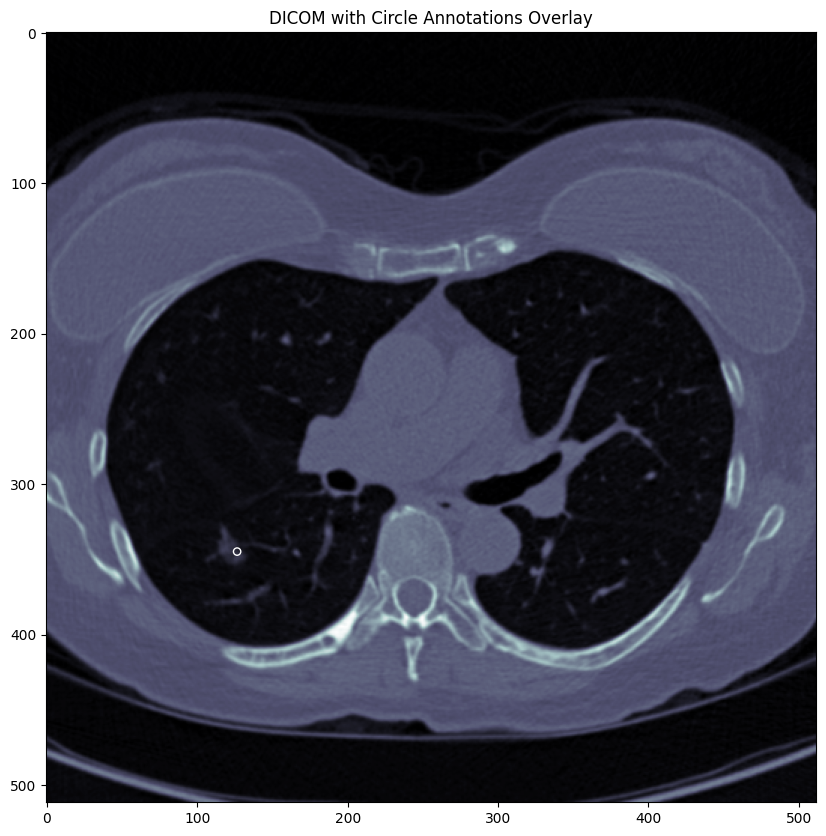

In [16]:
import xml.etree.ElementTree as ET
import pydicom
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np


xml_file = 'AMC-003.xml'
dicom_file = '1-130.dcm'

def extract_circle_annotations(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()


    ns = {
        'aim': 'gme://caCORE.caCORE/4.4/edu.northwestern.radiology.AIM',
        'xsi': 'http://www.w3.org/2001/XMLSchema-instance',
    }


    markup_entities = root.findall('.//aim:MarkupEntity[@xsi:type="TwoDimensionCircle"]', ns)


    circles = []
    for markup_entity in markup_entities:
        coordinate_elements = markup_entity.findall('aim:twoDimensionSpatialCoordinateCollection/aim:TwoDimensionSpatialCoordinate', ns)
        if len(coordinate_elements) == 2:
            x1 = float(coordinate_elements[0].find('aim:x', ns).attrib.get('value'))
            y1 = float(coordinate_elements[0].find('aim:y', ns).attrib.get('value'))
            x2 = float(coordinate_elements[1].find('aim:x', ns).attrib.get('value'))
            y2 = float(coordinate_elements[1].find('aim:y', ns).attrib.get('value'))

            center = (x1, y1)
            radius = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            circles.append((center, radius))

    return circles

dicom_data = pydicom.dcmread(dicom_file)
circles = extract_circle_annotations(xml_file)

plt.figure(figsize=(10,10))
plt.imshow(dicom_data.pixel_array, cmap=plt.cm.bone)

for center, radius in circles:
    circle = Circle(center, radius, color='w', fill=False)
    plt.gca().add_patch(circle)


plt.title('DICOM with Circle Annotations Overlay')
plt.show()

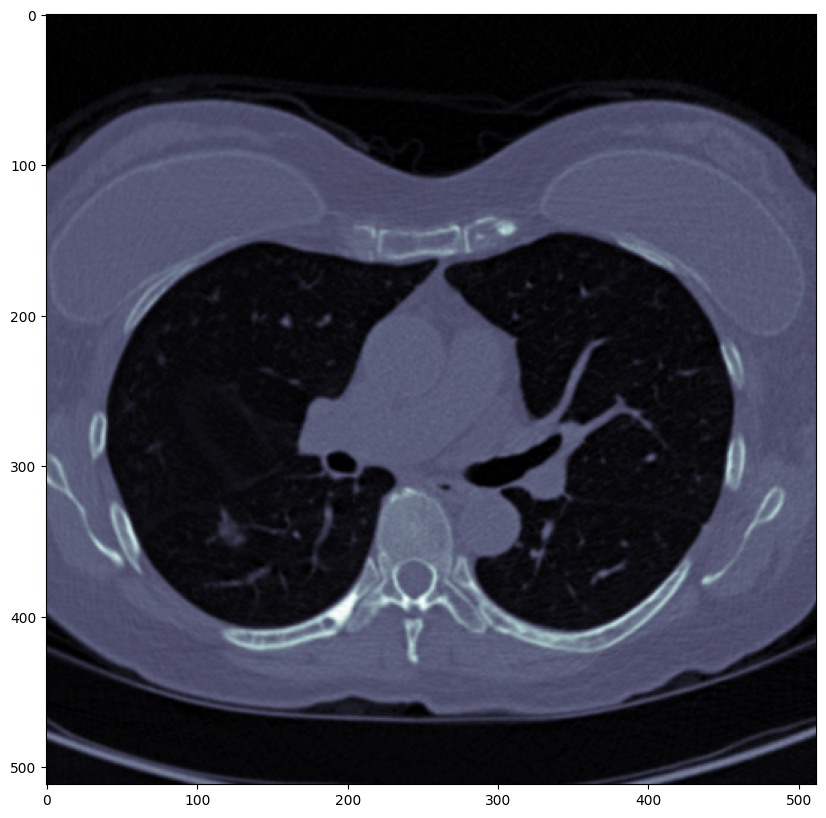

In [13]:
dicom_file = "1-130.dcm"
ds = pydicom.dcmread(dicom_file)


dicom_img_data = ds.pixel_array
plt.figure(figsize=(10,10))
plt.imshow(dicom_img_data, cmap=plt.cm.bone)
plt.show()